# Predicting Listing Gains in the Indian IPO Market Using TensorFlow

In this project, we will work as a data scientist for an investment firm that is interested in investing in the Initial Public Offerings (IPO) in the Indian market. Our task is to build a deep learning classification model to determine if there will be listing gains for the IPO. Listing gains are the percentage increase in the share price of a company from its IPO issue price on the day of listing.

The dataset we'll be using for this project contains information on past IPOs in the Indian market and comes from moneycontrol.

We'll cover all the major steps of the modeling pipeline, starting with exploratory data analysis, then moving on to visualizing the important variables, then finally creating a deep learning classification model.

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [98]:
indian_ipo_market_data = pd.read_csv('Indian_IPO_Market_Data.csv')


In [99]:
indian_ipo_market_data.head() # viewing the data

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
0,03/02/10,Infinite Comp,189.80,48.44,106.02,11.08,43.22,165,11.82
1,08/02/10,Jubilant Food,328.70,59.39,51.95,3.79,31.11,145,-84.21
2,15/02/10,Syncom Health,56.25,0.99,16.60,6.25,5.17,75,17.13
3,15/02/10,Vascon Engineer,199.80,1.12,3.65,0.62,1.22,165,-11.28
4,19/02/10,Thangamayil,0.00,0.52,1.52,2.26,1.12,75,-5.20


In [100]:
indian_ipo_market_data.info() # checking the columns and their datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   319 non-null    object 
 1   IPOName                319 non-null    object 
 2   Issue_Size             319 non-null    float64
 3   Subscription_QIB       319 non-null    float64
 4   Subscription_HNI       319 non-null    float64
 5   Subscription_RII       319 non-null    float64
 6   Subscription_Total     319 non-null    float64
 7   Issue_Price            319 non-null    int64  
 8   Listing_Gains_Percent  319 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 22.6+ KB


In [101]:
indian_ipo_market_data.isna().sum() # checking for null-values

Date                     0
IPOName                  0
Issue_Size               0
Subscription_QIB         0
Subscription_HNI         0
Subscription_RII         0
Subscription_Total       0
Issue_Price              0
Listing_Gains_Percent    0
dtype: int64

In [102]:
print(indian_ipo_market_data['Listing_Gains_Percent'].describe()) # checking the summary stats for our target variable
      

count    319.000000
mean       4.742696
std       47.650946
min      -97.150000
25%      -11.555000
50%        1.810000
75%       25.310000
max      270.400000
Name: Listing_Gains_Percent, dtype: float64


We want to create a classification model, but out target variable, 'Listing_Gains_Percent', is a continious variable. We will convert it to categorical variable

In [103]:
# Defining a function to apply on Listing_gains_profit to return a binary output for profit or loss
def profit_loss(value):
    if value > 0:
        return 1
    else:
        return 0
indian_ipo_market_data['Listing_Gains_Profit'] = indian_ipo_market_data['Listing_Gains_Percent'].apply(profit_loss)

indian_ipo_market_data.head()


,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent,Listing_Gains_Profit
0,03/02/10,Infinite Comp,189.80,48.44,106.02,11.08,43.22,165,11.82,1
1,08/02/10,Jubilant Food,328.70,59.39,51.95,3.79,31.11,145,-84.21,0
2,15/02/10,Syncom Health,56.25,0.99,16.60,6.25,5.17,75,17.13,1
3,15/02/10,Vascon Engineer,199.80,1.12,3.65,0.62,1.22,165,-11.28,0
4,19/02/10,Thangamayil,0.00,0.52,1.52,2.26,1.12,75,-5.20,0


In [104]:
indian_ipo_market_data.describe() # checking the summary stats for our dataset

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent,Listing_Gains_Profit
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,1192.859969,25.684138,70.091379,8.561599,27.447147,375.128527,4.742696,0.545455
std,2384.643786,40.716782,142.454416,14.508670,48.772203,353.897614,47.650946,0.498712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-97.150000,0.000000
25%,169.005000,1.150000,1.255000,1.275000,1.645000,119.000000,-11.555000,0.000000
50%,496.250000,4.940000,5.070000,3.420000,4.930000,250.000000,1.810000,1.000000
75%,1100.000000,34.635000,62.095000,8.605000,33.395000,536.000000,25.310000,1.000000
max,21000.000000,215.450000,958.070000,119.440000,326.490000,2150.000000,270.400000,1.000000


In [105]:
indian_ipo_market_data['Listing_Gains_Profit'].value_counts(normalize=True) 

# An average IPO tends to be slightly more profitable than not!
# 54% of IPOs listed were profitable.

1    0.545455
0    0.454545
Name: Listing_Gains_Profit, dtype: float64

In [106]:
indian_ipo_market_data.corr() # checking for correlations in our dataset


/tmp/ipykernel_64/653921556.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  indian_ipo_market_data.corr() # checking for correlations in our dataset


,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent,Listing_Gains_Profit
Issue_Size,1.000000,-0.037724,-0.103484,-0.147791,-0.093351,0.364733,0.019782,0.004717
Subscription_QIB,-0.037724,1.000000,0.773933,0.437462,0.815785,0.188105,0.395864,0.323499
Subscription_HNI,-0.103484,0.773933,1.000000,0.622993,0.954816,0.037283,0.375127,0.271879
Subscription_RII,-0.147791,0.437462,0.622993,1.000000,0.718738,-0.072112,0.424873,0.240842
Subscription_Total,-0.093351,0.815785,0.954816,0.718738,1.000000,0.051174,0.410753,0.283340
Issue_Price,0.364733,0.188105,0.037283,-0.072112,0.051174,1.000000,0.017544,0.039548
Listing_Gains_Percent,0.019782,0.395864,0.375127,0.424873,0.410753,0.017544,1.000000,0.673510
Listing_Gains_Profit,0.004717,0.323499,0.271879,0.240842,0.283340,0.039548,0.673510,1.000000


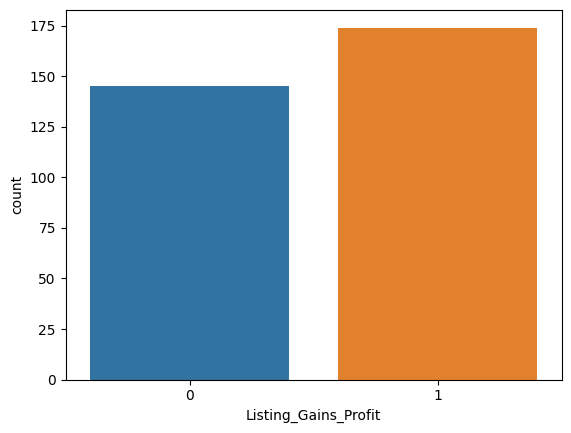

In [107]:
sns.countplot(data=indian_ipo_market_data, x='Listing_Gains_Profit')
plt.show() # visualizing the distribution of target variable
# the visualization backs the fact that IPOs are more prfitable than not


<AxesSubplot: xlabel='Listing_Gains_Profit', ylabel='Subscription_QIB'>

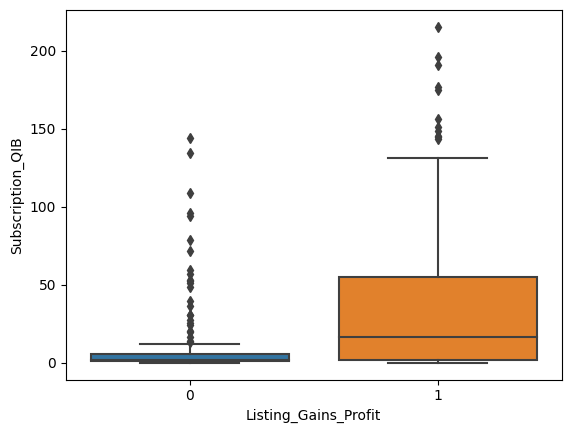

In [108]:
sns.boxplot(indian_ipo_market_data, x='Listing_Gains_Profit', y='Subscription_QIB')




<AxesSubplot: xlabel='Listing_Gains_Profit', ylabel='Subscription_HNI'>

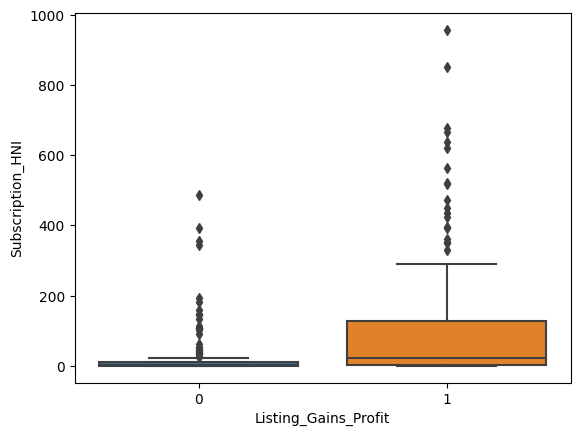

In [109]:
sns.boxplot(indian_ipo_market_data, x='Listing_Gains_Profit', y='Subscription_HNI')


<AxesSubplot: xlabel='Listing_Gains_Profit', ylabel='Subscription_RII'>

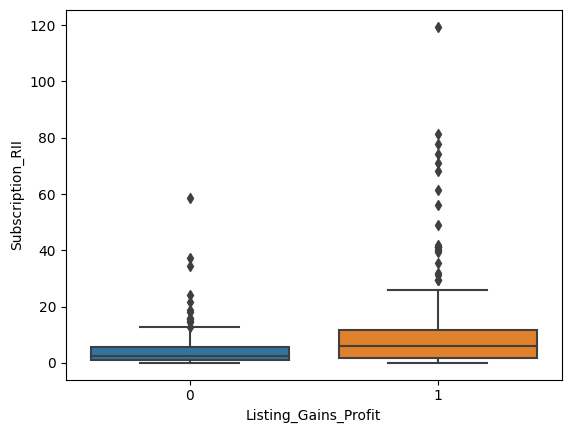

In [110]:
sns.boxplot(indian_ipo_market_data, x='Listing_Gains_Profit', y='Subscription_RII')


In [111]:
indian_ipo_market_data.columns

Index(['Date ', 'IPOName', 'Issue_Size', 'Subscription_QIB',
       'Subscription_HNI', 'Subscription_RII', 'Subscription_Total',
       'Issue_Price', 'Listing_Gains_Percent', 'Listing_Gains_Profit'],
      dtype='object')

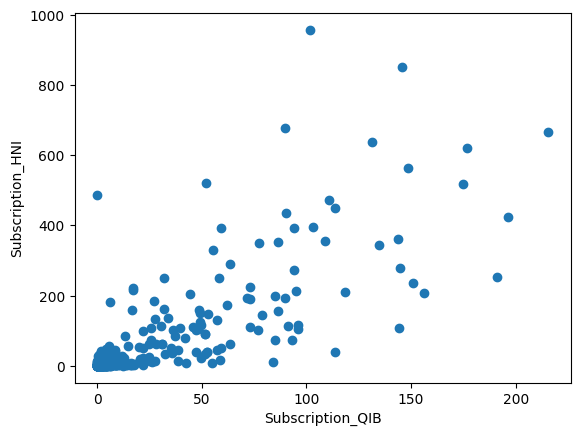

In [112]:
plt.scatter(indian_ipo_market_data['Subscription_QIB'],indian_ipo_market_data['Subscription_HNI'])
plt.xlabel('Subscription_QIB')
plt.ylabel('Subscription_HNI')
plt.show()



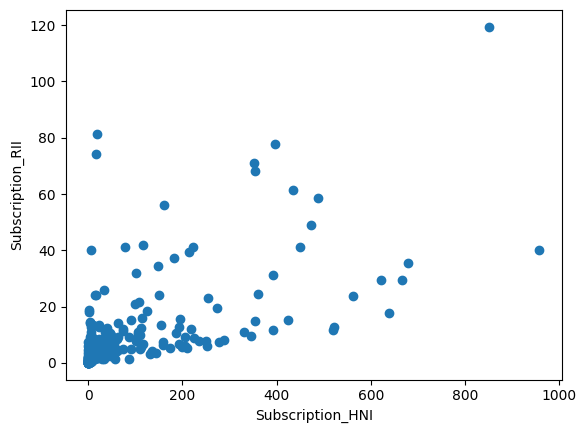

In [113]:
plt.scatter(indian_ipo_market_data['Subscription_HNI'],indian_ipo_market_data['Subscription_RII'])
plt.xlabel('Subscription_HNI')
plt.ylabel('Subscription_RII')
plt.show()


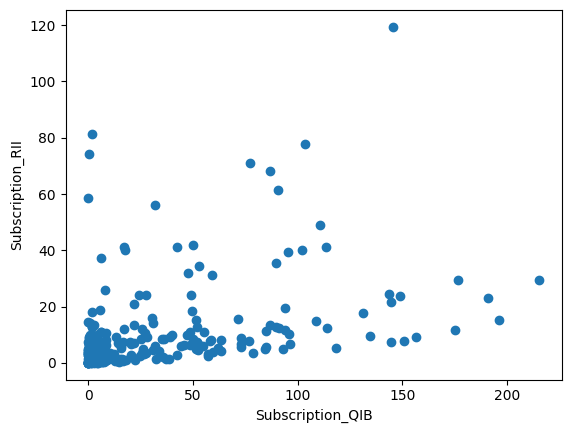

In [114]:
plt.scatter(indian_ipo_market_data['Subscription_QIB'],indian_ipo_market_data['Subscription_RII'])
plt.xlabel('Subscription_QIB')
plt.ylabel('Subscription_RII')
plt.show()



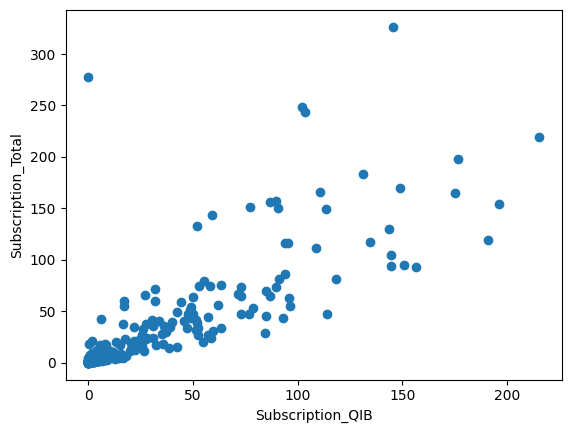

In [115]:
plt.scatter(indian_ipo_market_data['Subscription_QIB'],indian_ipo_market_data['Subscription_Total'])
plt.xlabel('Subscription_QIB')
plt.ylabel('Subscription_Total')
plt.show()

<AxesSubplot: xlabel='Subscription_QIB', ylabel='Subscription_RII'>

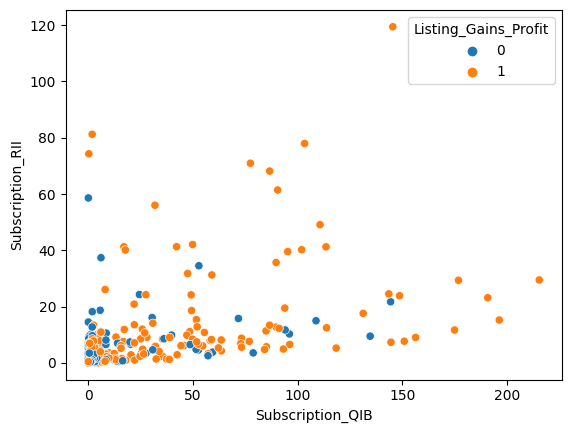

In [116]:
sns.scatterplot(indian_ipo_market_data, x='Subscription_QIB', y='Subscription_RII', hue='Listing_Gains_Profit')


From the visualization and pearson correlation coefficients we understand the following:
- Subscription_QIB, Subscription_HII, Subscription_RII, are the only variables with acceptable correlations for our model
- Subscription_Total is essentially a sum of all subscriptions, and therefore correlated with other variables, and we can drop this variable.
- The variables have outliers which would need to be treated.


In [117]:
# We will treat the outliers using IQR method

def outlier_treatment(column_):
    q1 = np.quantile(column_, 0.25)
    q3 = np.quantile(column_, 0.75)
    iqr = q3 - q1
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    column_ = column_.clip(lower,upper)
    return column_

In [118]:
indian_ipo_market_data['Subscription_QIB'] = outlier_treatment(indian_ipo_market_data['Subscription_QIB'])
indian_ipo_market_data['Subscription_HNI'] = outlier_treatment(indian_ipo_market_data['Subscription_HNI'])
indian_ipo_market_data['Subscription_RII'] = outlier_treatment(indian_ipo_market_data['Subscription_RII'])

In [119]:
indian_ipo_market_data.columns

Index(['Date ', 'IPOName', 'Issue_Size', 'Subscription_QIB',
       'Subscription_HNI', 'Subscription_RII', 'Subscription_Total',
       'Issue_Price', 'Listing_Gains_Percent', 'Listing_Gains_Profit'],
      dtype='object')

In [120]:
# Dropping the unnecessary columns
dropping_cols = ['Date ', 'IPOName', 'Issue_Size', 'Subscription_Total',
       'Issue_Price', 'Listing_Gains_Percent', 'Listing_Gains_Profit']

# Setting target and predictor variables
X = indian_ipo_market_data.drop(dropping_cols, axis=1)
y = indian_ipo_market_data['Listing_Gains_Profit']


In [121]:
# Normalizing the predictor variables using the max values for each variable:
X_normal = X.copy()
for i in X_normal.columns:
    X_normal[i] = X_normal[i].apply(lambda x: x/X_normal[i].max())
    
X_normal.describe()


,Subscription_QIB,Subscription_HNI,Subscription_RII
count,319.000000,319.000000,319.000000
mean,0.253601,0.263157,0.309232
std,0.342961,0.374477,0.315147
min,0.000000,0.000000,0.000000
25%,0.013551,0.008184,0.065051
50%,0.058212,0.033061,0.174490
75%,0.408131,0.404910,0.439031
max,1.000000,1.000000,1.000000


In [122]:
# Using the hold-out valdidation approach by creating train and test split:

X_train, X_test, y_train, y_test = train_test_split(X_normal,y, test_size=0.2,
                                                   random_state=101)


In [123]:
X_train.shape

(255, 3)

In [124]:
X_test.shape

(64, 3)

In [138]:
# Instantiating a model with the Keras Sequential API in TensorFlow
# Model1 - creating a shallow neural network with Sequantial API
model1 = tf.keras.Sequential()

# Adding a layer with 32 nodes, and using rectified linear unit activation
model1.add(tf.keras.layers.Dense(32, 
                                 input_shape=(X_train.shape[1],),
                                 activation = 'relu'))
# Adding the outplut layer
model1.add(tf.keras.layers.Dense(1))

model1.summary()



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                128       
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [139]:
# Compiling Model
# Using Adam optimizer and binary cross entropy as loss function
# Using Binary Accuracy and False-Negatives for metrics
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
loss = tf.keras.losses.BinaryCrossentropy()
model1.compile(loss=loss, optimizer=optimizer,
             metrics=[keras.metrics.BinaryAccuracy(),
                     keras.metrics.FalseNegatives()])

model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                128       
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [140]:
# Fitting the model on our training dataset, using epochs=150 and verbose 0 to reduce clutter in the output
model1.fit(X_train,y_train, epochs=150, verbose=0)

In [141]:
# Evaluating the model:
model1.evaluate(X_train,y_train)

8/8 [==============================] - 0s 1ms/step - loss: 0.5476 - binary_accuracy: 0.7216 - false_negatives_4: 44.0000


[0.5475767254829407, 0.7215686440467834, 44.0]

In [142]:
# Evaluating the model on test dataset:
model1.evaluate(X_test,y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.8850 - binary_accuracy: 0.5938 - false_negatives_4: 21.0000


[0.8850120306015015, 0.59375, 21.0]

The Model1 shallow neural network with sequantial API gives us an accuracy of 72% and 44 false negatives on training data. And 60% accuracy and 21 false negatives on test data.

In [144]:
# Creating Model2, a dense multi-layer deep neural network model with 6 layer:

model2 = tf.keras.Sequential()

model2.add(tf.keras.layers.Dense(32,
                               input_shape=[X_train.shape[1],],
                               activation='relu'))
model2.add(tf.keras.layers.Dense(16,
                               activation='relu'))
model2.add(tf.keras.layers.Dense(8,
                               activation='relu'))
model2.add(tf.keras.layers.Dense(4,
                               activation='relu'))
model2.add(tf.keras.layers.Dense(1)) # output layer



In [145]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                128       
                                                                 
 dense_11 (Dense)            (None, 16)                528       
                                                                 
 dense_12 (Dense)            (None, 8)                 136       
                                                                 
 dense_13 (Dense)            (None, 4)                 36        
                                                                 
 dense_14 (Dense)            (None, 1)                 5         
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


In [146]:
# Using the same optimizer, loss function, and metrics as for last model.
model2.compile(loss=loss, optimizer=optimizer,
             metrics=[keras.metrics.BinaryAccuracy(),
                     keras.metrics.FalseNegatives()])

model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                128       
                                                                 
 dense_11 (Dense)            (None, 16)                528       
                                                                 
 dense_12 (Dense)            (None, 8)                 136       
                                                                 
 dense_13 (Dense)            (None, 4)                 36        
                                                                 
 dense_14 (Dense)            (None, 1)                 5         
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


In [147]:
# Fitting the model
model2.fit(X_train, y_train, epochs=150, verbose=0)


In [148]:
# Evaluating on train dataset
model2.evaluate(X_train, y_train)

8/8 [==============================] - 0s 1ms/step - loss: 0.5572 - binary_accuracy: 0.7176 - false_negatives_5: 39.0000


[0.5571734309196472, 0.7176470756530762, 39.0]

In [149]:
# Evaluating the test dataset
model2.evaluate(X_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.8705 - binary_accuracy: 0.6250 - false_negatives_5: 16.0000


[0.8704818487167358, 0.625, 16.0]

The Model2 dense deep neural network with sequantial API gives us an accuracy of 72% and 39 false negatives on training data. And 63% accuracy and 16 false negatives on test data.

The Model2 with dense deep neural network with sequential API performs better classification compared to the Model1.